# Regression 실습 : (Used Cars Dataset : Predict used car Price)

--------------

# Table of Contents

1. 스크래핑된 dirty 데이터 클리닝
2. 데이터 정규화
3. 데이터 시각화를 통한 인사이트 도출
4. xgboost, lightGRM 기반의 모델 학습
5. 학습된 모델의 평가 및 시각화

--------------

## Data Info

[Attribute]

- id
- url
- region
- region_url
- price
- year
- manufacturer
- model 
- condition 
- cylinders 
- fuel
- odometer
- title_status 
- transmission 
- VIN 
- drive 
- size 
- type        
- paint_color 
- image_url 
- description 
- state 
- lat     
- long    
- posting_date 

[Data Source] : https://www.kaggle.com/austinreese/craigslist-carstrucks-data

--------------

## 0. 모듈 임포트

In [121]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 호출 기본 탐색

In [89]:
df = pd.read_csv('./data/vehicles.csv/vehicles.csv')
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [5]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


#### pric, odometer의 중위값, 평균값을 볼 때, 상당히 큰 편차가 존재하는 것을 확인할 수 있음. 
> 데이터의 분포가 정규화되어 있지 않음을 의미

### ▼ 기초 전처리

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [124]:
# 불필요한 칼럼 제거

df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 
         'state', 'lat', 'long', 'posting_date'], axis=1, inplace=True)

In [125]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [126]:
# df['year'] 칼럼은 차량의 생산일자를 의미함. >> 연식을 파악하기 위해 현재 연도에서 뺄셈 연산 후 age 칼럼으로 추가

df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [127]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,others,35990,chevrolet,others,good,8 cylinders,gas,32742.0,other,rwd,NaN,others,NaN,11.0
1,others,7500,others,others,excellent,4 cylinders,gas,93600.0,automatic,fwd,NaN,sedan,NaN,7.0
2,others,4900,others,others,good,6 cylinders,gas,87046.0,automatic,NaN,NaN,SUV,blue,15.0
3,others,2000,chevrolet,others,good,4 cylinders,gas,190000.0,automatic,rwd,full-size,pickup,blue,47.0
4,others,19500,ford,others,excellent,8 cylinders,diesel,116000.0,automatic,4wd,full-size,pickup,blue,16.0


---------------

# 2. 데이터 통계 분석 및 시각화

##     2-1범주형 데이터

In [15]:
print(df['manufacturer'].nunique())
df['manufacturer'].value_counts()

43


ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


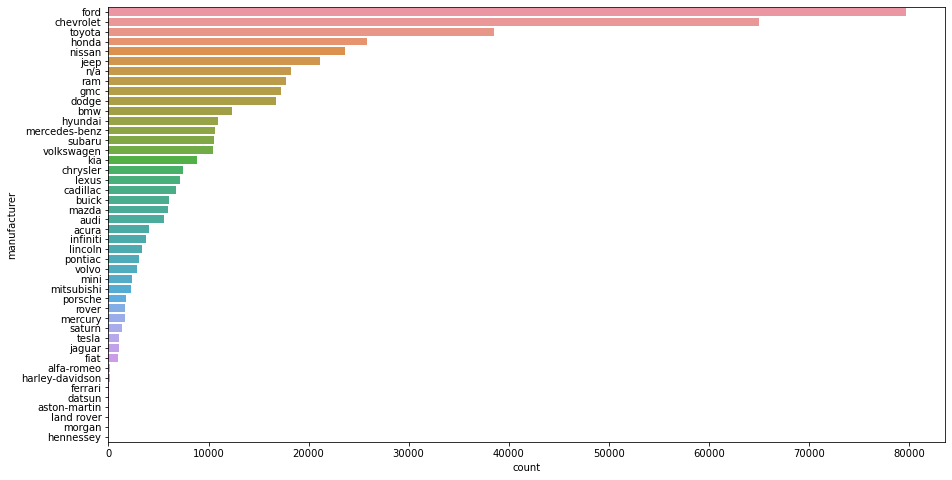

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [20]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
    print (model, num)

f-150 8370
silverado 1500 5964
1500 4211
camry 4033
accord 3730
altima 3490
civic 3479
escape 3444
silverado 3090
explorer 2941
equinox 2923
corolla 2801
wrangler 2788
mustang 2652
malibu 2649
tacoma 2649
fusion 2608
grand cherokee 2574
focus 2491
grand caravan 2445
2500 2438
tahoe 2266
cr-v 2230
impala 2127
cruze 2125
sonata 2062
elantra 2010
sentra 1914
jetta 1870
prius 1863
rav4 1832
odyssey 1831
outback 1791
silverado 2500hd 1780
edge 1735
charger 1718
sierra 1500 1696
rogue 1687
forester 1514
traverse 1489
camaro 1472
pilot 1441
wrangler unlimited 1412
3500 1396
suburban 1381
f-250 1357
corvette 1345
sienna 1328
highlander 1318
f150 1311
acadia 1308
tundra 1302
soul 1294
sierra 1272
cherokee 1220
f-350 1164
journey 1117
passat 1098
taurus 1091
town & country 1091
4runner 1080
optima 1073
expedition 1073
challenger 1005
impreza 1004
murano 997
300 992
fusion se 966
colorado 960
enclave 957
c-class 952
escalade 930
pathfinder 914
durango 910
sorento 908
200 907
ranger 902
liberty 86

SCION XD 28
sprinter 2500 passenger 28
e350 xl hightop wheelchair 28
explorer eddie bauer 4x4 28
Any 28
maxima 3.5 sv 28
lifted silverado 1500 28
civic type r touring 28
escape xlt 4wd 28
x5 xdrive50i m-sport awd 28
prelude 28
montego 27
f-250 crew cab xlt 4x4 27
leaf sl 27
oldsmobile alero 27
accord lx-p 27
ecosport titanium sport 27
4x4 27
x5 xdrive35d awd diesel 27
silverado 3500 hd 27
m4 27
tiguan s 27
s10 blazer 27
civic bad credit 27
gla-class 27
super beetle 27
m37 27
540i 27
rogue sport s 27
smart fortwo 27
f150 xlt fx4 4x4 1/2 ton 27
mazda3 touring 27
aviator 27
qx80 sport utility 4d 27
is250 awd f-sport 27
s3 27
1500 rebel 27
outback 2.5i limited awd 27
challenger srt8 27
2500 lifted long bed americ 27
silverado 2500 ltz du 27
330e iperformance 27
cruze lt auto 27
is 200t 27
colorado 4wd z71 27
tacoma trd sport 4x4 27
highlander le 27
ranger edge 27
cooper clubman s 27
wrangler 4x4 27
Suzuki SX4 27
prius prime premium 27
grand marquis gs 27
f-150 raptor 26
smart fortwo electr

2500 crew cab 4x4 mega cab laramie 12
rav4 base 12
challenger sxt coupe 2d 12
2500 power wagon 12
s-10 pickup 12
200 200c sedan 4d 12
prius four touring 12
juke sl awd 12
240d 12
1500 slt 4x4 half ton 12
silverado 1500 wt 12
b-class b 250e 12
2500 crew cab slt 4x4 12
escape hybrid awd 12
740 12
fit lx hatchback 4d 12
f-350 sd xlt crew cab long bed 4wd 12
370z sport tech coupe 2d 12
titan sv 4x4 12
g20 van 12
hardtop 4 door 12
range evoque pure 12
1500 limited 4x4 gas 12
f150 svt raptor 12
jetta 2.5 se 12
focus zx4 se 12
impala lt sedan 4d 12
cooper s countryman all4 12
equus signature sedan 4d 12
3 series 328i xdrive sport 12
escape limited 4wd 12
econoline wagon xlt 11
dts sedan 4d 11
sierra 1500hd 11
equus 11
fiesta sel 11
128i coupe 11
frontier sv crew cab 11
econoline 350 extended 11
sc430 convertible 11
f-150 88,000 miles 1 11
highlander le plus 11
yukon xl denali sport 11
tacoma limited 11
g37 convertible 11
jx 11
750i / b7 11
sierra 1500 at4 11
cc sport plus sedan 11
xlr 11
a6 3

WE FINANCE 6
legacy 2.5i premium awd 6
sienna xle 8 passenger 6
3500 laramie longhorn 6
sienna limited awd 6
accord sport 4dr sedan cvt 6
mazda3 i sv 6
slk230 kompressor 6
a4 quattro s-line 6
passat komfort 6
traverse lt 1lt 6
tundra crew max 6
e46 m3 6
taurus awd leather loaded 6
explorer xlt - 4wd - flex fuel - third row seat - 6
ml550 6
nv2500 hd 6
plymouth road runner 6
Accord Sedan 6
f-250 4x4 6
mazda3 - navi - rear camera - blind spot assist - 6
Plymouth Deluxe 6
silverado 2500 diesel 4x4 6.6l duramax turbo diesel z71 ext cab short bed allison 1000 automatic one owner 6
accord se sedan 6
EZ-GO RXV 6
Black Friday Sale 6
escape sel suv 6
323 6
blazer base 6
ADVANCEDEV 2+2 6
colorado 4wd 2.9 liter 6
prism 6
gto coupe w/upgraded 5.7 6
2 series m235i convertible 6
routan s 6
tundra 2wd 6
legacy - rear camera - bluetooth - bluetooth - 6
elantra sport 6
celica gts 6
g6 sedan 6
impala limited - sunroof - recently smogged - 6
240 dl 6
1500 crew cab laramie 6
outback 2.5 xt limited 6
city 

v60 premier low miles 4
928s 4
300 300c 4
maserati quattroporte s 4
Mack CH613 T/A Water Truck 4
grand caravan gt premium 4
HINO XJC700 4
outlook xe awd 4
express cutaway 3500 4
sq5 premium plus 4
eos convertible 4
tucson limited full fac 4
OLDSMOBILE CUTLASS 4
c30 t5 hatchback 2d 4
mazda5 sport minivan 4d 4
rav 4 awd 4
f150 super crew 4x4 4
a4 1.8t 4
chevelle ss 396 4
-SALE PENDING-MERCEDES-BENZ ML-C 4
Model X 4
beretta 4
oldsmobile cutlass ciera 4
club wagon 4
renegade altitude 4
nova ii 4
escort se 4
tahoe z-71 4wd 4
cts 3.6l premium 4
mustang gt/cs 4
odyssey 5dr ex-l w/res 4
International 9200i 4
lancer gt 4
2500 crew diesel 4x4 4
HUMMER H3 Alpha 4WD SUV LEATHER 4
land cruiser fj40 4
sienna limited premium 7 4
f-150 2wd reg cab 145" xl 4
1500 express quadcab 4x4 4
corolla base 4
f350 super duty crew cab k 4
silverado 2500hd z71 4x4 4
Fleetwood PACE ARROW 4
sierra diesel durmax 2500 hd 4
r/t 4
colorado ext cab z-71 4
tucson se 4wd 4
trailer 4
passat tsi 4
malibu lt1 automatic 4
taco

cr-v spcial edition 3
terrain suv 3
svx 3
frontier se v6 3
accord sdn ex 3
Junk Cars 3
300 csedan 3
mariner premier 4x4 3
f-150 king ranch 4x4 4dr 3
kenworth t660 3
s500 4matic 3
f250 restored 3
x5 xdrive35i awd 35i 3
jetta s 6-speed automatic 3
1995 3
suzuki aerio sx 3
silverado ss 3
Freightliner FL50 3
e-250 cargo 3
f-150 xlt crew 3
expedition el ltd. 4x4 3
every make every model 3
458 italia 3
tracker base 3
sonata se sedan 3
silverado 1500 ltz 1lz 3
passat 4motion 3
f-350 super cab lariat 3
Suzuki SX4 LE 3
Mack B Model 3
x2 sdrive28i 3
sorento ex v6 awd 3
mustang cobra convertible 3
x5 xdrive40i 3
ls city express cargo van 3
sierra 1500 z-71 3
clk350 3.5l 3
boneville 3
avalanche ltz 4x4 3
atlas s 4motion sport 3
city express cargo va 3
r F-PACE 3
1500 custom trail boss z71 3
tucson se sport utility 3
fusion se awd! awd 3
escape s automatic 3
durango rt 3
acadia slt 1 4dr suv 3
express 15 passenger 3
tucson se suv 3
2500 powerwagon 4x4 3
sierra 3500hd 4x4 3
grand caravan rt 3
canyon

SUZUKI VITARA 2
galant es 4-speed automatic 2
land cruiser 1997 2
mercades benz 2
civic 4dr auto ex 2
accent gs hatchback 4d 2
rx 350 fsport 2
MG Roadster 2
KAWASAKI NINJA 2
sierra crew cab 4x4 2
6 mazda6 grand touring 2
elantra se 6at 2
cr-v lx suv 2
passat gls 1.8t 4motion 2
xf i4 t 2
mr2 spyder convertible 2
z4 3.0 2
trailblazer ext ls 4wd 2
pathfinder se 4wd 5-speed automatic 2
tundra 4wd off road 2
sierra classic 1500 2
outback sport 2
soarer 2
86 trd special edition 2
prius c - recently smogged - great commuter car - 2
2013 traverse 2
base 2
lifted silverado 3500 2
xj 8 2
f-550 southwind 2
tl 3.5 2
rogue sport awd 2
530i m sport 2
element -- ex -- 4wd 2
camaro ss 1le 2
es 350 fwd 2
s10 zr5 2
F-250  4WD  6.7L  LARIAT  130K 2
impala lt automatic 2
gle 350 sport 2
fusion se sdn 2
YV4952CY7B1597258 2
focus wagon zxw 2
1500 sport*4wd*v8,5.7l hemi 2
veracurz 2
benz 560 sl convertible 2
volkwagen jetta 2
1984 El Camino 2
rogue sv awdcrossover 2
pathfinder sl 4x4 2
ranchero 500 2
F-350  

prius v five wagon 2
highlander 4dr v6 4wd (natl) 2
s3 turbo awd prestige 2
golf r32 2
tacoma reg cab 4x4 2
f-150 platinum 6.2 4x4 2
Ford/Custom 2
mazda3 mazdaspeed3 sport 2
wrangler sport 4x4 gas suv 2
kenworth 338 2
taho lt 4x4 2
edge 4dr limited fwd 2
f250 4x4 diesel crew cab 2
international dump truck 2
SUPER DUTY F-550 2
f-150 triton 2
vue i4 2
trax premier 2
rc 200t base 2dr coupe 2
cx-9 signature awd 2
packard 2
f450 super duty lariat 2
transam 2
silverado 2500hd ltz c 2
jetta sedan 1.8t se 2
rx8 40th anniversary 2
sienna le 7-passenger 2
mga 2
e350 sd bus 2
es 300h hybrid 2
crew cab 4x4 z71 2
jetta gls wagon 2
f-150 5.0l v8 4x4 2
Pontaic Grand Prix 2
2500 mega limited diesel 2
cts luxury awd 2
tucson awd 4dr sport 2
q50s 2
6 i grand touring sedan 2
sebring convertable 2
Eclipse 241SS MONSTER ENERGY EDITION  LIMITED 2
sequoia sr5 premium 7 passenger leather power fold 3rd row 2
Plymouth Sport Fury 2
sierra 2500hd at4 2
e-350 super duty xlt 2
sport v8 2
explorer limited suv 2
cvr

1500 sport 4wd w/navigation 1
compass limited sport 1
elantra sport 4dr sedan 1
unlimited sahara 4x4 1
Jetta/Wolfsberg Edition 1
tundra 8ft bed 4x4 1
focus st fwd gas hatchback 1
Star Coupster 1
f150 flare side 1
e350 superduty van 1
journey se automatic 1
SAHARA  ONLY  59K  MILES 1
c-class c 300 spo 1
mx-5 miata se 1
thunderbird deluxe hard top convertible only 77k black leather 1
e-350 super duty dwr 1
corvette l/ 82 1
cherokee classic 4dr classic 1
e-350 box/utility truck 1
dakota big horn 4x4 1
forta 1
F350 UTILITY 1
mustang cobra gt 1
KIAOPTIMA EX-GDI 1
1500 sport quad cab 4wd 1
e-150 cab van 1
amg gle 43 coupe 1
liberty sport 4wd #20 1
uplander mobility 1
maibu ls 1
CT200n premium 1
12.6 X 5.6 1
Carrera Two Door, 7 Speed Manual 1
1958 Fleetwood 1
f350 king ranch diesel 1
Premier Sedan V6 AWD 4D 1
350sd 1
enclave fwdcx 1
benz c-280 amg 1
3500 crewcab tradesma 1
suzuki sx4 sport back 1
colordo 1
accent gs 3-door 1
Internationa 9400 1
rx 330 std automatic 1
x5 awd 4dr 35d 1
1995 Int

higlander 1
CHEVORLET TRAVERSE 2LT 1
milan premier sedan 1
geo prizm lsi 1
accord se 2.4 1
Copma C1930-5 1
dart sxt/rallye 1
cadenza sedan 4d 1
Triumph Trident 1
s 70 1
sierra diesel duramax 1500 1
2005 saab 1
hybrid 1
santa fe limitedsuv ( 1
mustang gt h&r lowerin 1
Freightliner Day Cab 1
prius v wagon 5 1
pathefinder 2008 1
Hino 2006 1
2009 Tiger Truck 1
328i sports wagon 1
Homemade flatbed 1
transit t-350/passenger van 1
4runner limited 2wd v6 1
Jetta S 1
1978 el camino 1
passt 1
g35x sedan luxury 1
jeepgrand cherokeelaredo 4x4 - 1
s 550 4matic sedan 1
compass all new latitude 1
Forde Expedition XLT 1
Premier Eagle 1
e 350 box truck 1
1993 ChevyUtility Truck 1
2011 freightliner spinter 3500 1
vanette camper 1
BMW328i 1
cst- 10 truck 1
lemans custom 1
av alanche 1500 1
mazda6 touring sedan 4d 1
accord se sedan at 5-speed automatic 1
3500 crewcab 1
e350 cutaway van 1
CRSY Stryker 1
Vantage 1000 1
peterbilt 337 1
Crasher PT Cruiser 1
camaro z/28 tribute 1
xc60 3.2l awd 1
Triumph GT6+ 1

international cf500 1
slt 4.7l 4x4 1
camry se sport sedan 1
f-650 mason dump truck 1
silverado duramax 3500 1
srx4 premium 1
aviator reserve 1
rx 350 l 1
corolla s. 1
HYUNDAY GENESIS R-SPEC 1
a3 sedan 2.0t quattro s 1
benz s320 w 1
Accura ILX 1
focus titanium*leather*moo 1
grand cherokee 4wd 4dr srt 1
g35 x sedan 1
yukon xl denali 4d sport utility automatic 1
Plymouth belevedere 1
2 hatch back 1
2011  F-550  4WD  6.7L  DIESEL 1
3500 1 ton 1
rs7 4.0t quattro prestige 1
sunbeam alpine 1
Mazda3 i sport 1
626 4dr sdn lx 4-cyl auto 1
mustang fastback 2+2 v8 1
300gd 1
MGMidget 1
Very clean.... 1
c70 convertible 2.5t 1
s-40 t-5 awd 1
falcon station wagon 1
JEEPSTER COMMANDO 1
hhr ls panel 1
sedona 2006 1
model 3 dual motor awd 1
cmax energi premium 1
rav4 2wd 1
pilot elite automatic 1
c-class c 240 1
For 1
focus se-hatchback 1
Isuzu Rodeo S 1
atlas v6 se 4motion 1
4.6 hse 1
s5 l 1
Scion tC 2dr HB Auto (SE) 1
pacifica a.w.d. 1
CHEROKEE SPORT 1
f150 xlt supercrew xlt 4x4 1
is 350 f-sport v6 1
p

x5 diesel twin turbo 1
2006 SCION XB 1
1500 big horn quad cab 1
odyssey ex l w/navi 1
Grand Liberty * BAD CREDIT * 1
forester 2.5i all wheel drive 1
TLX 1
rams tradesman 1
transit cargo van t-150 148" low rf 8600 gvwr sliding rh dr 1
renegade altitude sport 1
c 2500 1
qx60 base awd 1
series 62 coupe 1
Legacy 2.5i Premium AWD 1
taurus x wagon limited awd automatic 1
altima sl 2500 1
SONATA TURBO LIMITED 1
pick up 1500 - 2003 1
Rx350 1
topkick c5500 1
tdi pu 1
HOMEMADE TRAILER MOTORCYCLE 1
sierra crew 1
grand caravan bruanability 1
b7 s4 avant 1
International 4900 dump truck 1
centurian 1
2019 LATEMODELS IN HOUSE FINANCE 1
rx-8 touring 1
grand cherokee overland edition 4x4 v6 1
deluxe 2dr 1
corolla - le 1
L300 MX120 1
avalanch 1
catalina hardtop 1
camaro 2lt rs 1
etc 1
2GCEK13M681166401 1
express 2500 cargo ra 1
charger. 1
passat sti 1
Saab 9/3 converetable 1
sunrader 1
caravan 3.8l 1
328i x-drive awd 1
Audi4 Sedan 1
benz s-class s 320 1
ud1200 box truck diesel 1
passat 2.5l sel 1
wrangl

2500 tradesman crew cab 1
sl65 1
silverado ltz 2500hd 1
3500 rack body 1
2 1/2 ton flatbed 1
trd off road 4x4 1
mkx premium package 1
FordF150 1
rogue krom awd 1
rav3 1
civic ex 2dr coupe (1.8l i 1
compass latitude 4 x 4 1
International 7600 workstar 1
rav4 base 4x4 suv 1
Crysler LeBaron 1
Bugeye Sprite 1
camry le 4dr sedan v4 1
chevolet malibu 1
forte sedan 4d 1
z4 2.5 1
Superformance GT40 1
Shelby GT-H 1
LincolnTown Car MK VI 1
ct3 1
prius 2013 1
taurus sw 1
1967 Superformance Cobra 1
bay window 1
2013 Dod 1
Crysler Town and Country 1
x3 xdrive28d 1
TOYOYA  COROLLA 1
f250 platinum 4x4 1
For F-700 1
grand caravan express 6-speed automatic 1
TRIUMPH 1
benz s600x maybach 1
2500 slt 4dr quad cab 5.9l cummins diesel 2 owners 1
M35 A3 1
124,539 1
2003 suzuki aerio 1
prius prime 5d hatchback 1
conversion van awd 1
neon se 4dr sedan 1
fontier 1
sequoia sr5 2wd 1
mustang shelby cobra gt 500 1
smart fortwo passion Cabriolet 1
camaro 500 pace car 1
forte lx 4dr hatchback 1
crv exl-awd 30mpg 1
F

tt quattro 3.2 1
c280 awd 1
impala ltz 2lz 1
accord sedan ex-l 2.0t 1
750 750li 1
Chrystler 300c 1
International Durastar 1
transit xlt rwd gas auto 1
f-150 2wd extended cab 1
2001 Oldsmobile Aurora 1
2500 express ls 1
olet Express Commercial Cutaway 1
silverado 1500 1500 z9 1
rdx awd w/advance pkg 1
tundra limited 4x4 only 94k heated leather lifted 20s 33s 1
cts awd coupe 1
q70 3.7x 1
c 300 luxury 4mati 1
highlander l awd 3rd row 1
67 camaro 1
for sale!! 1
citroen 1
challenger srt8 6.1l v8 6 1
JEPP WRANGLER 1
l series wagon lw1 1
classic model 1
fuso 160 1
l series l300 1
tow dolly 1
rav-4 sport 1
149000 1
g25 journey 1
3-series 335i convertible 1
wranger jk 1
xj-series xjl portfolio 1
e-550 1
savana 3500 ls diesel 1
silverado ltz 2500 hd 1
oddysey ex-l 1
f 350 4x4 lariat diesel 1
corvette hardtop 1
challenger r/t*hemi v8,5. 1
tacoma sr5 4x2 1
f650 xl super duty 1
acadia sle2 fwd 1
silverado 1500 lt hybrid 1
hardtop 2 door john cooper 1
Nissian NV 1
eclipse cross es fwd 1
2001 Monte C

sport v6 hse 1
crosstrek 2.0 premium awd wagon heated seats 89k lifted mint 1
durango rt awd 1
aspen ltd awd 1
tacoma 2dr 4x4 p.u. 1
1972 am general 1
llucerne 1
lucrene 1
e 350 bluetec luxury 3.0l diesel turbo v6 1
1989 gm humvee 1
golf gls 1.8t alh 1
transport 1
sierra slt crew cab 4wd 1
mits gallant 1
benz 1996 s600 v12 1
Kia-Subaru-Toyota-Ford F-150-VW 1
f-150 xlt xlt 4dr supercrew 1
armored 1
International Diesel PU 1
x3i 1
x5 xdrive35i xdrive35i 1
torrent 2008 1
5-series sport wagon 1
quattro awd 1
328xi 3 series xdrive 1
hyundia accent 1
378 Petetbilt 1
sierra 2500hd sle 4x4 1
coupe cooper s 2dr coupe 1
sxt 1
2.5 SE 1
w4s042 14050 gvwr gas reg 1
mdx awd*leather*navi*3rd 1
expedition king ranch 4x4 1
Hudson Hornet Super Special 1
lancer evolution x 1
lt 9513 1
stealth v6 awd 1
KEYS COUGAR 1
clse 1
fits 1
rav4 sport suv 4d 1
malibu classic lt 1
fusion 4dr sdn titanium fwd 1
x1 xdrive28i heads up displ 1
titan pro 4-x 1
hi 1
ls 250 1
f 250 and 450 1
128i 1-series coupe 1
exl 1
envi

International 4000 1
sonic 2lt hatchback 1
windtar 1
g35 x -- awd -- 1
Hellcat Challenger SRT Widebody 1
f250 4x4 crew cab 1
f150 xlt supercrew cab 4wd 1
F-350  PLATINUM *4WD 6.7L *88K 1
f350 xlt (gas) 1
escape xlt awd 4dr 1
2500 hd silverado 1
stake bed 1
liberty 3.7 v6 1
silverado 2500 ls 4dr 1
cdv 1
e-class e 350 | 1
titan 4wd crew cab swb p 1
750li 4d white sedan 1
rs 1
rio s hatchback 4d 1
550i xdrive 86k 1
1965 corvette 1
m550 1
silverado+1500 1
f-250 regular cab 4x4 1
Niss 1
wrangler sport x 1
mirada 1
1985 Bitter 1
Elcamino 1
mdx sh-awd/nav/tech 1
civic type r hatcheback 1
OLVO XC60 T6 AWD PLATINUM 1
500sec 1
grand cherokee limited 5.9 1
Lincoln, NE 1
cadenza technology sedan 4d 1
POSTSMASTER CITY TRADESMEN VAN 1
2000 CAMARO SS 1
tundra platinum 4x4 1
chevelle / malibu 1
525it 1
fusion se*moon roof*cam*fu 1
2007f150 1
focus fuel flex 1
eos cooper beetle 1
mkx elite 1
2008 scion xb 1
2.5i Premium Wagon 4D 1
accord sedan touring automatic 1
f150 super crew xlt 4x4 1
econolline 1


k2500 hd plow truck 1
1500 laramie limited crew 1
camry xle auto (natl) 1
taurus ses wagon 1
3/4ton van 1
6 i 2.5l 1
1985 635 csi 1
milan v-6 premier awd 1
sportage ex awd heated leather navigation pano 1 owner 1
aerosedan 1
1953 3100 1
Cars, Trucks 1
pilot ex l 4x4 4dr suv 1
mustang premium leather 2-o 1
1982 Camaro Berlinetta 1
rogue sl*awd*back up cam 1
grand cherokee 4dr laredo 1
v-12 1
e150 conv. van 1
q5 quattro 4dr 3.2l premium plus 1
ranger extended cab 1
2018 Grand Cherokee Trailhawk 1
yukon sle sle 4dr suv 1
escape titanium turbo 1
fiesta st fwd gas hatchback 1
2004 F-150 4X4 EXT CAB 1
f650 box truck 1
morris minor 1
accord sedan sport 1.5t cvt 1
2009 Smart car for two 1
g35x-sport v-6 3.5l awd 1
f150 raptor ecoboost 4x4 1
250 super cab 1
LAMBORGHINI HURRACAN 1
murano sl - all wheel 1
B4542/010 1
sierra silverado 1500 1
explorer sport awdsuv 1
pilot ex-l 4d sport utility automatic 1
1500 longhrn 1
silverado 1500 z71 4wd 1
Isuzu P'up Diesel 1
1993 Isuzu NPR 1
Camry Hybrid 1
30

mustang gt500 1
sonata se sedan 4d 1
mustang 289 1
scon xd trd 1
savana cargo van 2500 1
3-series gran turismo 1
g1500 vans 1
c2500 cheyenne extended cab only 119k two tone 1
es 350 | accident-free 1
2500 crew cab hemi 1
MACK RD 1
transit t150 cargo van 1
2014 Isuzu NQR Crew Cab 1
liberty renegate 1
bucket t (steel body) 1
Merceds-Benz R-Class R320CDI 1
camry solara sle convertible 1
4500hd flat bed 1
Coachman Camper Van 1
navigator 4dr suv 1
cheverolet 1
744 gle 1
F-350 Diesel Lariat 1
charger srt8 super bee 1
fusion se hybrid sedan 4dr 1
Acela Monterra 1
ridgeline rtl-e 4wd 1
535i sedan sport premium gps leather moon 2 owners 1
q5 quattro premium 1
- f350 lariat crew cab 4x4 1
wranger unlimited 1
cruze lt auto automatic 1
sentra 2017 1
sierra 1500 slt crew cab 143 1
ml350 4-matic/nav 1
sentra ca 1
armada titanium 4wd 1
mdx touring awd 4dr 1
handyman 150 wagon 1
town & country swb 1
savana 2500 extended 1
benz 350sl 1
fit ex cpo 1
sierra 1500 4x4 sle z71 1
matrix s sport wagon 4d 1
ud

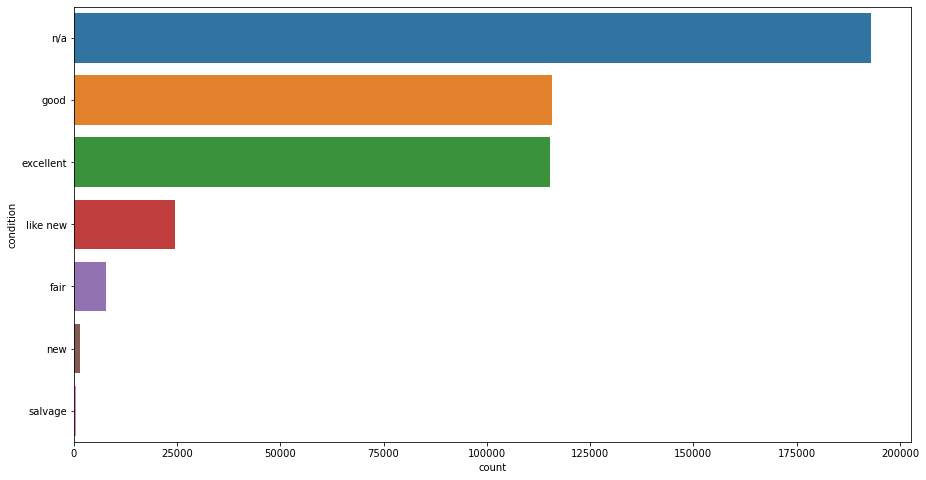

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

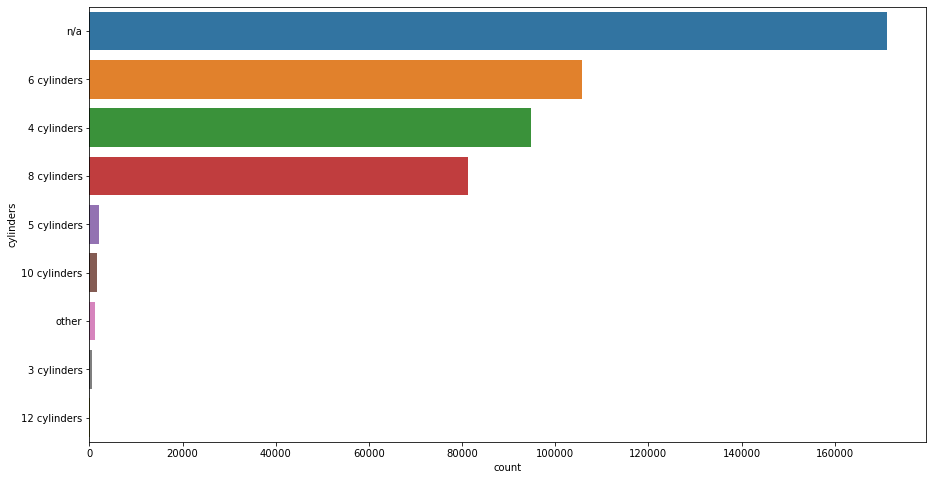

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

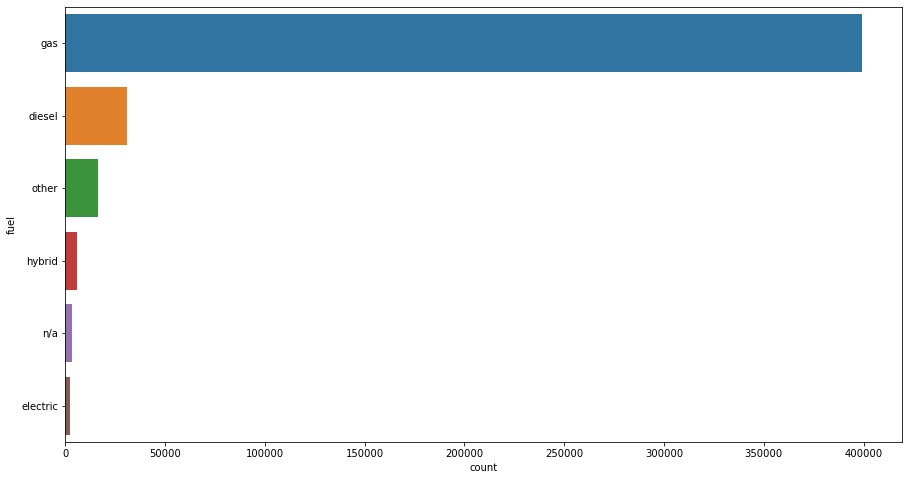

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

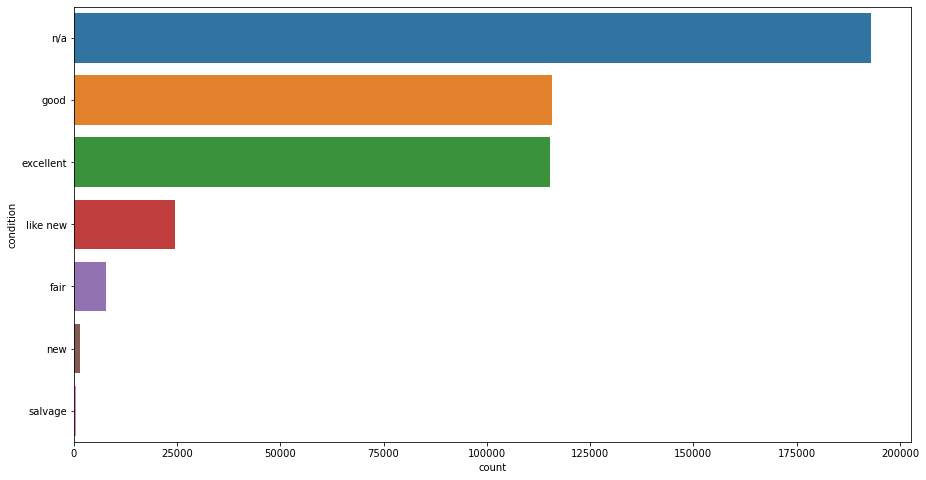

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

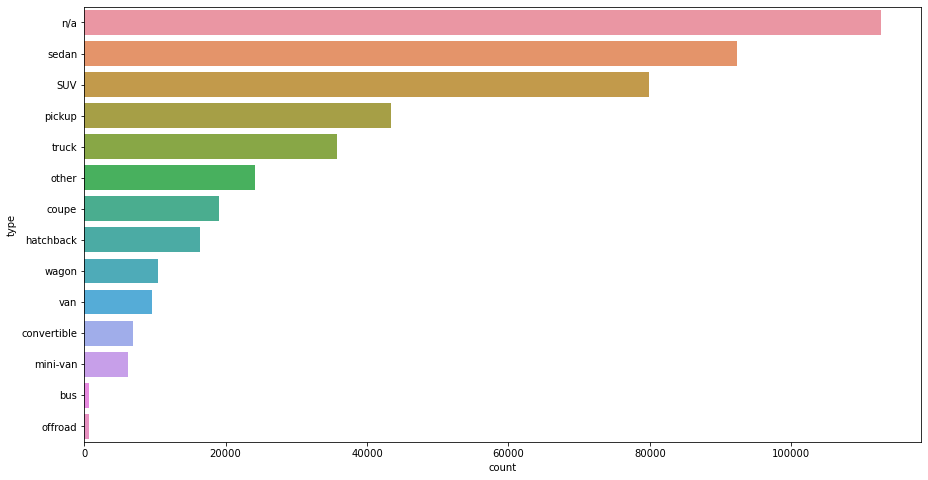

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

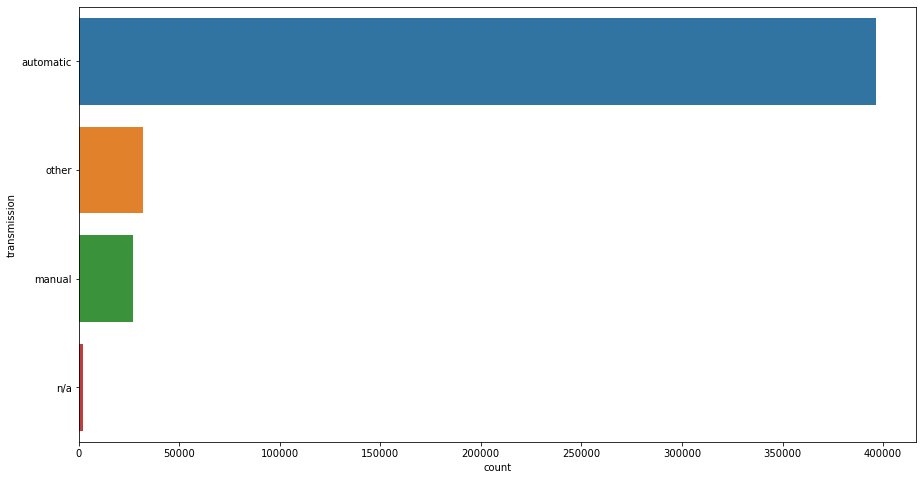

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

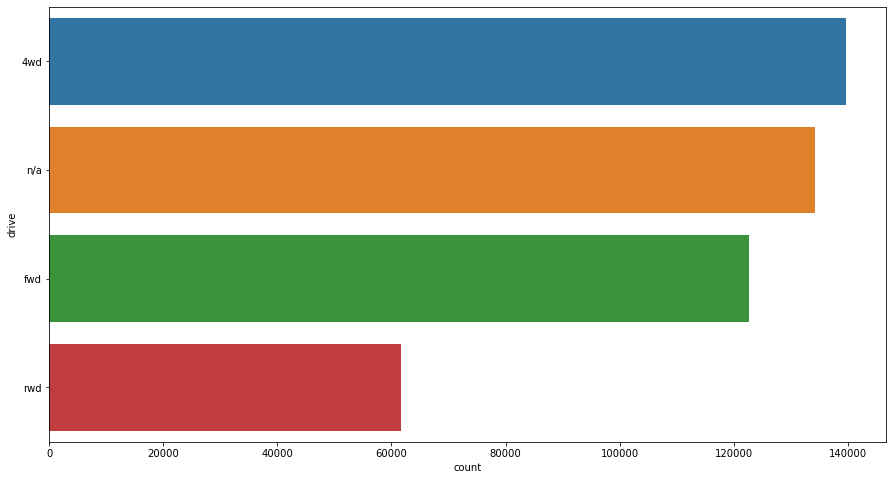

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

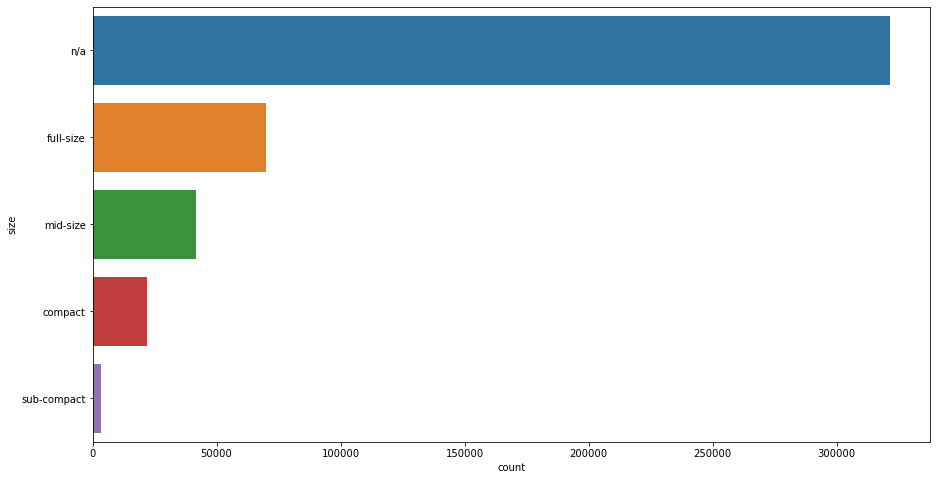

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

## 2-1수치형 데이터

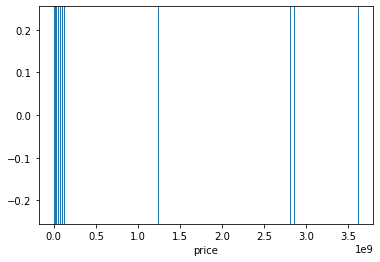

In [32]:
sns.rugplot(x='price', data=df, height=1) # 숫자 범위가 너무 크고 양이 많아서 histplot으로 그리기 어려움

#### - 수치의 범위가 너무 넓을 경우 histplot으로 그리면 부하가 걸리므로, 이 같은 경우엔 rugplot을 이용하는 것이 좋음
[해석] ☞ 가격은 주로 0 부근에 분포되어 있으며(고객 선제시로 가격 명시 안해놓은 케이스로 예상) 1000000000 이상 금액의 아웃라이어 관측됨

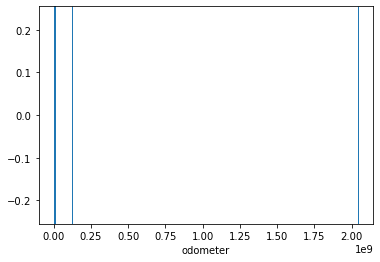

In [35]:
sns.rugplot(x='odometer', data=df, height=1)

[해석] ☞ 0.12 부근과 2.00 부근의 관측치 관측

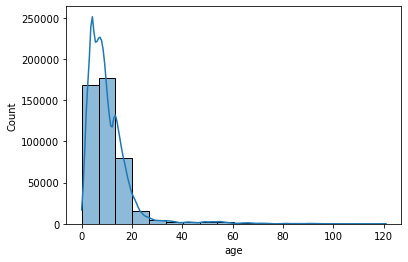

In [37]:
#5~10년식 차량이 가장 많이 분포

sns.histplot(x='age', data=df, bins=18, kde=True)

------------------

# 3. 데이터 클리닝

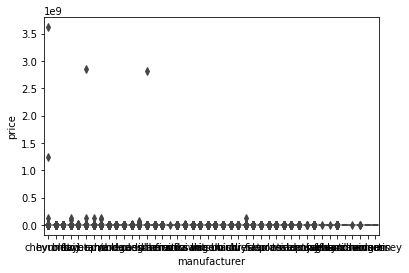

In [39]:
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

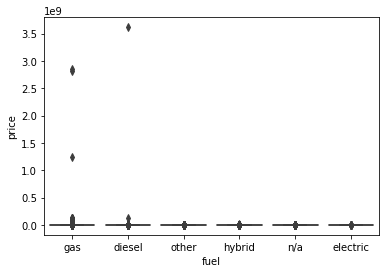

In [40]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

#### ▶ 아웃라이어로 인해 boxplot이 제대로 표현되지 않음

## 3-1. 범주형 데이터 클리닝

1. 결손 데이터가 포함된 ROW 제거
2. 결손 데이터를 others 범주로 변경하기
3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
4. classifier를 학습해서 결손 데이터를 추정하여 채워넣기

### ▼ manufacturer

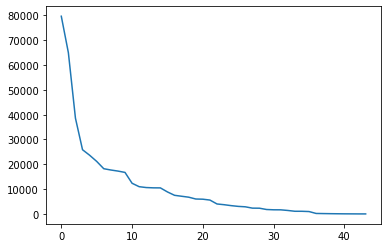

In [90]:
# 간략하게 시각화하기

col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

In [13]:
counts

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
others             18220
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63


In [91]:
n_categorical = 10
# counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')

In [92]:
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

### ▼ region

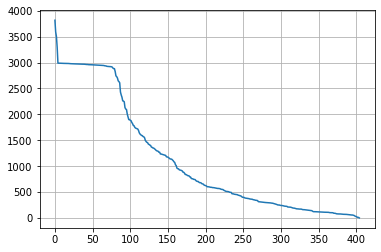

In [93]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [94]:
n_categorical = 5
# counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

### ▼ model

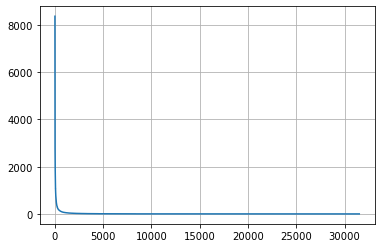

In [95]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [96]:
n_categorical = 10
# counts.index[n_categorical:]
others = counts.index[n_categorical:]  # lamda를 적용해야하는 데이터가 30000개나 되기 때문에 이렇게 따로 빼서 적용한 후 lambda 식에서는 others만 적용해주면 훨씬 빠르다.
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

### ▼condition

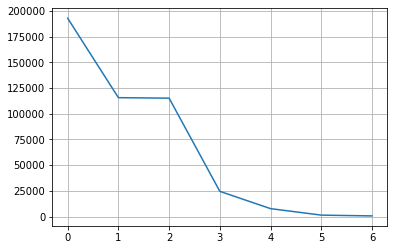

In [97]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [98]:
n_categorical = 3
# counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

### ▼ cylinders

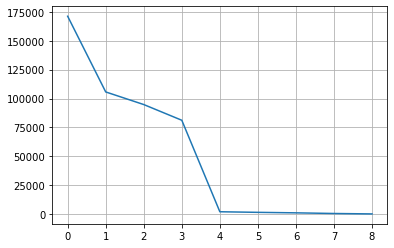

In [99]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [100]:
n_categorical = 4
# counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

### ▼ fuel

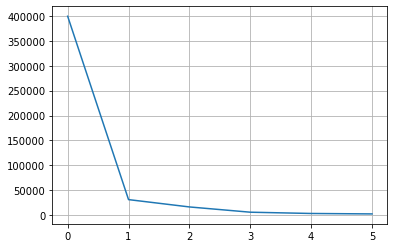

In [101]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [102]:
n_categorical = 2
# counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

### ▼ title_status

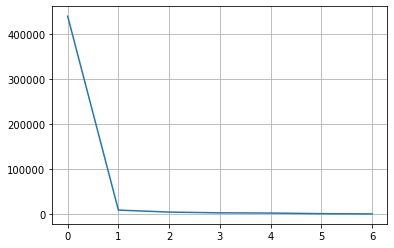

In [103]:
col = 'title_status'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

title_status 칼럼의 경우 0값을 가진 데이터가 너무 많다. -> 전처리해도 쓸모 없으므로 칼럼 자체를 삭제하는게 옳은 결정

In [104]:
df.drop('title_status', inplace=True, axis=1)

### ▼ transmission

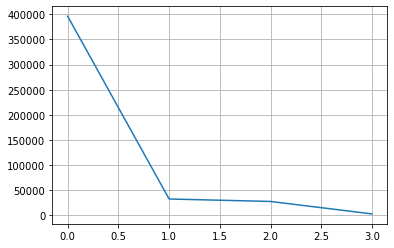

In [105]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [106]:
n_categorical = 3
# counts.index[n_categorical:]
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

### ▼ drive

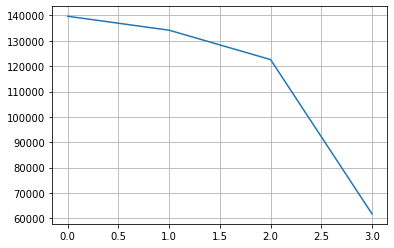

In [107]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

3번째도 수가 꽤 되는 관계로 그대로 유지

In [108]:
 df[col].fillna('others').value_counts()

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64

### ▼size

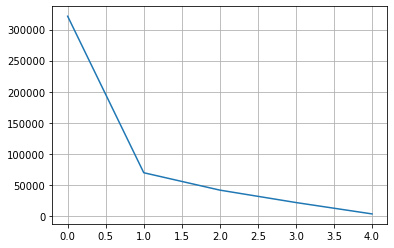

In [109]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [110]:
df[col].fillna('others').value_counts()

others         321348
full-size       69736
mid-size        41782
compact         21825
sub-compact      3522
Name: size, dtype: int64

In [111]:
n_categorical = 2
# counts.index[n_categorical:]
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

### ▼ type

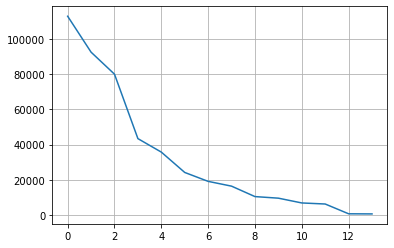

In [112]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [113]:
df[col].fillna('others').value_counts()

others         112738
sedan           92364
SUV             79882
pickup          43343
truck           35694
other           24160
coupe           19106
hatchback       16388
wagon           10473
van              9574
convertible      6864
mini-van         6263
bus               717
offroad           647
Name: type, dtype: int64

In [114]:
n_categorical = 8
# counts.index[n_categorical:]
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

sedan        92364
SUV          79882
pickup       43343
truck        35694
others       34538
other        24160
coupe        19106
hatchback    16388
Name: type, dtype: int64

In [115]:
# 기존의 other값을 others로 변경하여 합치기

df['type'] = df['type'].replace('other','others')
df[col].value_counts()

sedan        92364
SUV          79882
others       58698
pickup       43343
truck        35694
coupe        19106
hatchback    16388
Name: type, dtype: int64

### ▼ paint_color

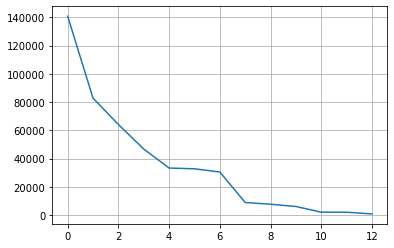

In [116]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [117]:
n_categorical = 7
# counts.index[n_categorical:]
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [118]:
df[col] = df[col].replace('other','others')
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

## 3-2. 수치형 데이터 정규화

- price, odometer, age 칼럼에 대한 정규화 진행
- 아웃라이어, 분포 편향을 맞춰주기 위함

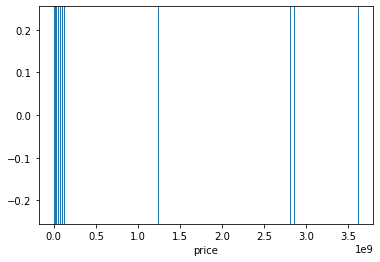

In [131]:
sns.rugplot(x='price', data=df, height=1) # 숫자 범위가 너무 크고 양이 많아서 histplot으로 그리기 어려움

#### ▶ 아웃라이어가 관측되며, 많은 가격이 0원으로 책정되어있을 가능성이 예상됨

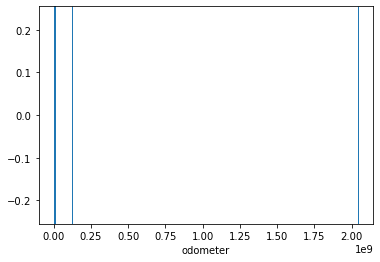

In [35]:
sns.rugplot(x='odometer', data=df, height=1)

#### ▶ 아웃라이어가 관측

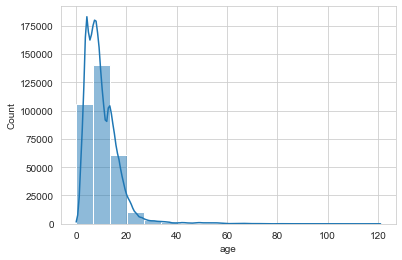

In [350]:
#5~10년식 차량이 가장 많이 분포

sns.histplot(x='age', data=df, bins=18, kde=True)

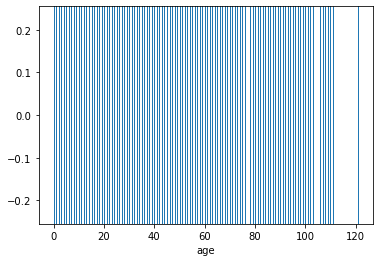

In [130]:
sns.rugplot(x='age', data=df, height=1)

### outlier 제거하기 - Quantile 메소드 이용

In [137]:
# 상위 1%, 하위 10% 제거

p1 = df['price'].quantile(0.99)
p99 = df['price'].quantile(0.1)
print(p1, p99)

59900.0 651.0


In [150]:
df = df[(p1>df['price']) & (p99<df['price'])]

In [139]:
# 상위 1%, 하위 10% 제거

o1 = df['odometer'].quantile(0.99)
o99 = df['odometer'].quantile(0.1)
print(o1, o99)

270000.0 17553.0


In [151]:
df = df[(o1>df['odometer']) & (o99<df['odometer'])]

In [152]:
df.describe()

,price,odometer,age
count,324382.000000,324382.000000,323860.000000
mean,15314.530106,102569.319602,10.174001
std,11298.917484,55165.135400,7.076283
min,652.000000,17555.000000,0.000000
25%,6500.000000,56199.000000,5.000000
50%,12388.000000,98146.000000,9.000000
75%,21000.000000,140482.750000,13.000000
max,59895.000000,269930.000000,121.000000


#### [해석] : mean(평균)값과 50%(중위값) 이 비슷해졌으며, 가우시안 분포에 가까워졌다고 볼 수 있다.

## 데이터 클리닝 후 다시 시각화

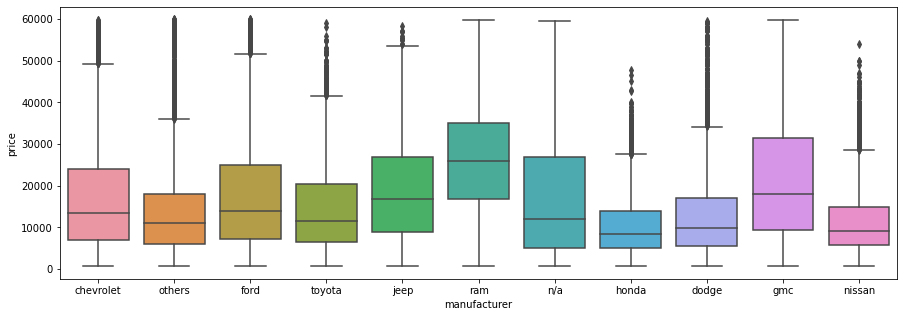

In [156]:
plt.figure(figsize=(15,5))
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

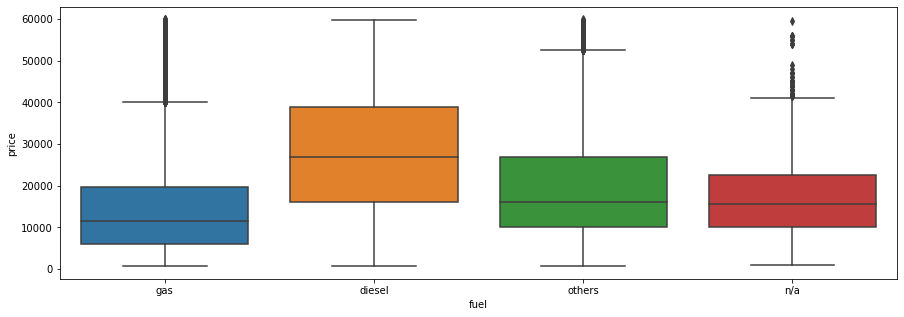

In [157]:
plt.figure(figsize=(15,5))

sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

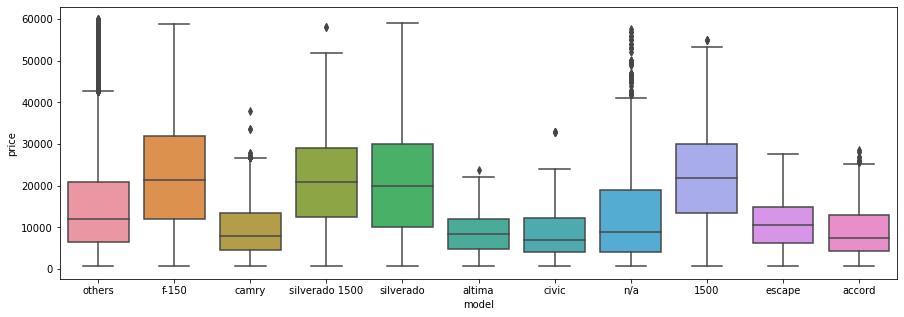

In [160]:
plt.figure(figsize=(15,5))
sns.boxplot(x='model', y='price', data=df.fillna('n/a'))

#### 값의 범위는 대체적으로 비슷하지만 (특히 manufacturer) 평균 값의 차이가 서로 다양하게 차이나기 때문에 머신이 각각을 구분할 수 있는 좋은 척도가 될 수 있다. >> 아예 박스 자체가 엇갈린 경우가 더 뚜렷하게 구분되기 때문에 더 좋음

### Correlation heatmap

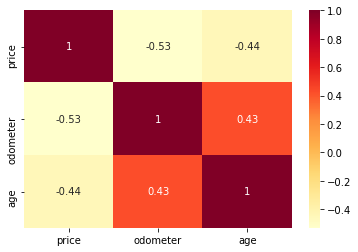

In [164]:
sns.heatmap(data=df.corr(), annot=True, cmap='YlOrRd')

-------------------

# 4. 데이터 표준화

-  수치형 : StandardScaler() 적용
-  범주형 : One-Hot-Encoding 적용

In [165]:
from sklearn.preprocessing import StandardScaler

#### 1.StandardScaler 를 이용해 수치형 데이터를 표준화하기

In [176]:
X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [361]:
X_scaled.head()

,odometer,age
0,-1.265789,0.116728
1,-0.162591,-0.448541
2,-0.281398,0.681997
3,1.584893,5.204152
4,0.243464,0.823315


#### 2.get_dummies 를 이용해 범주형 데이터를 one-hot 벡터로 변경하기

In [179]:
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

In [362]:
X_cat.head()

,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


#### 3. 1,2 번 결과물 통합

In [180]:
x = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [182]:
print(x.shape)
x.head()

(324382, 60)


,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.265789,0.116728,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.162591,-0.448541,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.281398,0.681997,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.584893,5.204152,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0.243464,0.823315,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [189]:
x.isna().sum().sort_values(ascending=False)[:5]

age                     522
paint_color_white         0
manufacturer_others       0
model_silverado 1500      0
model_silverado           0
dtype: int64

 카테고리 변수는 null값을 모두 채워줬지만 수치형 변수는 채우주지 않음. age에 대한 결측치 522개 채워주야

In [191]:
x['age'].mean()

2.4065666124846312e-15

StandardScaler 적용 전이라면 위의 값으로 평균 대체 시켜주면 되겠지만, 해당 데이터는 이미 StandardScaler가 적용된 값이기 때문에 0이 평균 값임

In [195]:
x.fillna(0.0, inplace=True)

-----------------------

# 5. 학습 데이터와 테스트 데이터 분리

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.3)

In [203]:
y_train.head()

251526    22500
308036     7920
48170     16445
15359     38995
198112    11500
Name: price, dtype: int64

-----------------------

# 6. 모델 적용하기 

## 6-1. XGBoost Regression

In [333]:
from xgboost import XGBRegressor

In [210]:
# 기본 적용

model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt # 루트를 씌워 rmse를 나타내기 위함

In [329]:
pred = model_reg.predict(X_test)
print("MAE : ", mean_absolute_error(y_test, pred))
print("RMSE : ", sqrt(mean_squared_error(y_test, pred)))  # mean_squared_error : 에러의 제곱 이후 평균

MAE :  3082.850478131094
RMSE :  4718.425793825494


[결과] : 오류 값이 MAE 기준 3082달러, RMSE기준 4718달러로 실제 가격과 매우 크게 차이남

### ▼ XGBoost + GridSearch 적용

In [330]:
from sklearn import model_selection

In [334]:
xg = XGBRegressor()

In [331]:
xg_parameters ={'max_depth' : [3,4,5,6] , 
                'n_estimators': [12,24,32], 
                'learning_rate':[0.01, 0.1], 
                'gamma': [0.5, 1, 2], 
                'random_state':[99]
               }

In [337]:
grid_search_XGB = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'neg_root_mean_squared_error', cv = 10 )
grid_search_XGB.fit( X_train, y_train)
best_gb = grid_search_gb.best_estimator_

print(grid_search_XGB.best_params_)
print(grid_search_XGB.best_score_)

NameError: name 'grid_search_gb' is not defined

In [363]:
print("최적 파라미터 : ", grid_search_XGB.best_params_)
print("RMSE : ", grid_search_XGB.best_score_)

최적 파라미터 :  {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 32, 'random_state': 99}
RMSE :  -5439.454960027988


-----------------------

## 6-2. LGBM Regression 

In [342]:
from lightgbm import LGBMRegressor

In [343]:
# 기본 학습 적용

model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, y_train)

LGBMRegressor()

In [344]:
pred_lgbm = model_lgbm.predict(X_test)
print("MAE : ", mean_absolute_error(y_test, pred_lgbm))
print("RMSE : ", sqrt(mean_squared_error(y_test, pred_lgbm)))

MAE :  3310.160732780817
RMSE :  5011.57011458337


### ▼LGBM + GridSearch 적용

In [345]:
lgbm_parameters = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [12,24,32],
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress
    'random_state' : [99],
    }

In [364]:
grid_search_lgbm = model_selection.GridSearchCV ( estimator = model_lgbm, param_grid = lgbm_parameters, scoring = 'neg_root_mean_squared_error', cv = 10 )
grid_search_lgbm.fit( X_train, y_train)
best_lgbm = grid_search_lgbm.best_estimator_

print("최적 파라미터 : ", grid_search_lgbm.best_params_)
print("RMSE : ", grid_search_lgbm.best_score_)

최적 파라미터 :  {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_bin': 510, 'n_estimators': 32, 'random_state': 99}
RMSE :  -5475.367345042341


-----------------------

# 7. 모델학습 결과 분석하기 (XGBoost 결과 기준)

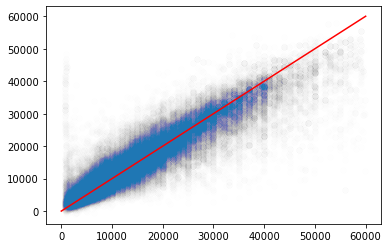

In [225]:
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,60000], [0,60000], 'r-')

[결과 해석] : 저렴한 차에 대해선 대체적으로 잘 맞추고 있는 모양새지만 비싼 차의 경우 실제 가격에 비해 저평가되는 모양새임, 실제로 0원에 가까우 차에 대해선 비싼 가격으로 예측하기도함

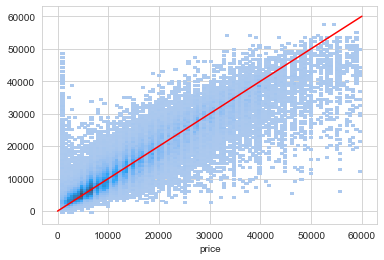

In [365]:
# 위와 같은 그래프 Seaborn으로 구현

sns.histplot(x=y_test,y=pred)
plt.plot([0,60000], [0,60000], 'r-')

### 에러 값 확인

 - 히스토그램

(-100.0, 100.0)

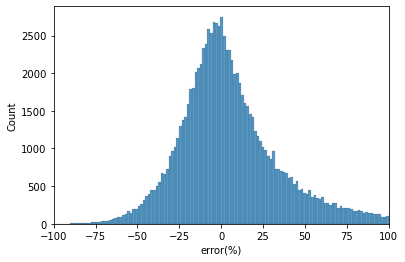

In [238]:
# err의 히스토그램으로 에러율 히스토그램 확인하기

err = (pred-y_test)/y_test*100
sns.histplot(err[err<300])
plt.xlabel('error(%)')
plt.xlim(-100,100)

x축 0지점은 정확히 예측한 경우, 왼쪽은 실제 가격보다 저평가한 경우, 오른쪽은 실제보다 고평가한 경우

Text(0.5, 0, 'error($)')

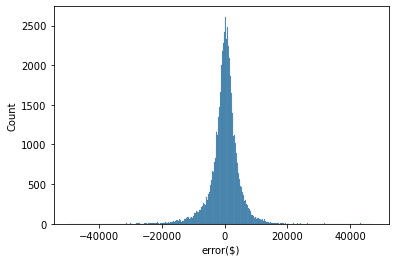

In [246]:
# 실제 오차액으로 확인하기

err = (pred-y_test)
sns.histplot(err)
plt.xlabel('error($)')

-----------------------

# 8. Feature_importances 추출

In [260]:
pd.DataFrame(model_reg.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
drive_fwd,0.170746
fuel_diesel,0.109971
age,0.098387
drive_4wd,0.073819
cylinders_4 cylinders,0.061673
cylinders_8 cylinders,0.057422
type_pickup,0.037946
manufacturer_nissan,0.035490
fuel_gas,0.031520
odometer,0.020220


In [271]:
def plot_feature_importance(model, df, figsize=(10, 6)):
    sns.set_style('whitegrid')
    
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())   # 상대성을 파악하기 위해
    sorted_idx = np.argsort(feature_importance)
    ypos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(15,17))
    plt.barh(ypos, feature_importance[sorted_idx], align='center')
    plt.yticks(ypos, df.columns[sorted_idx])
    plt.xlabel('Relative importance')
    plt.title('Feature importance')
    plt.show()

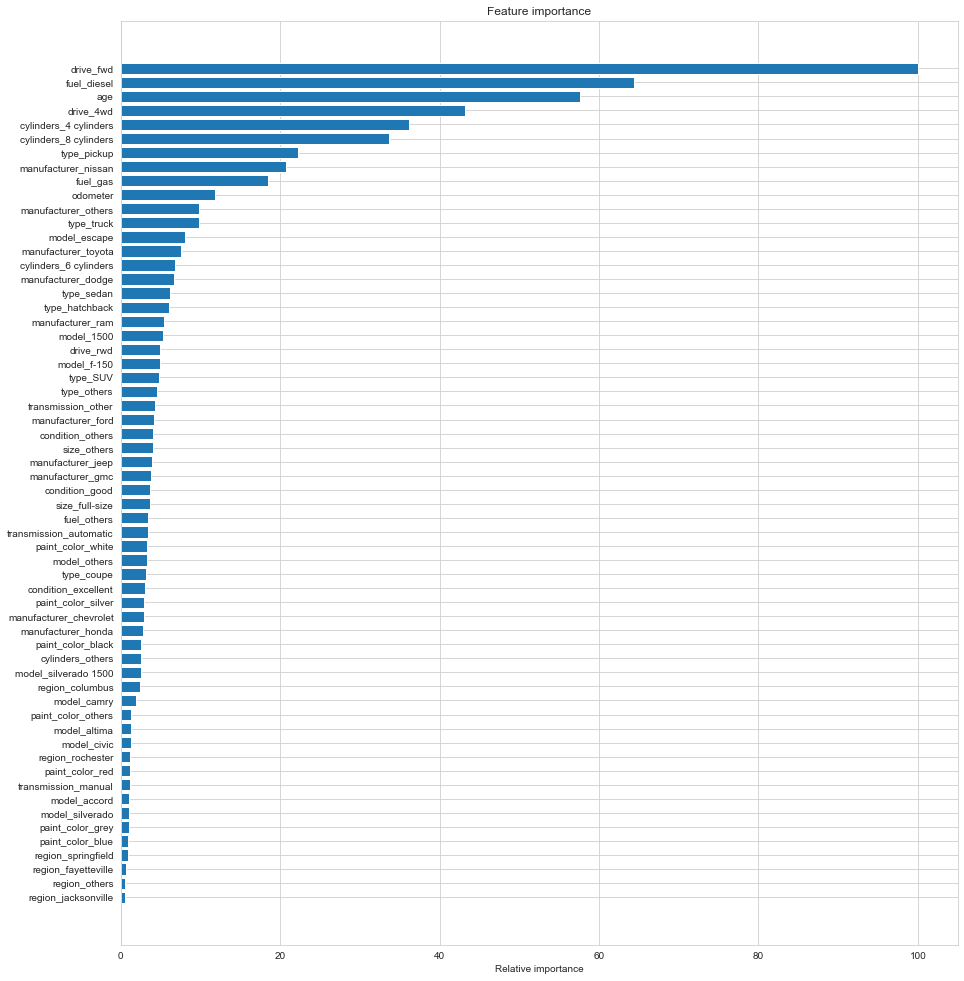

In [272]:
plot_feature_importance(model_reg, X_train)